In [1]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.coeff2header as c2h
import scipy.signal as signal
import imp # for module development and reload()
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
#%config InlineBackend.figure_formats=['png'] # default for inline viewing
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX
#%Image('fname.png',width='90%')

# FIR Filter Design

Both floating point and fixed-point FIR filters are the objective here. we will also need a means to export the filter coefficients to header files. Header export functions for `float32_t` and `int16_t` format are provided below. The next step is to actually design some filters using functions found in `scipy.signal`. To support both of these activities the Python modules `fir_design_helper.py` and `coeff2header.py` are available.

**Note**: The MATLAB signal processing toolbox is extremely comprehensive in its support of digital filter design. The use of Python is adequate for this, but do not ignore the power available in MATLAB.

## Windowed (Kaiser window) and Equal-Ripple FIR Filter Design

The module `fir_design_helper.py` contains custom filter design code build on top of functions found in `scipy.signal`. Functions are available for winowed FIR design using a Kaiser window function and equal-ripple FIR design, both type have linear phase. 

### Example: Lowpass with $f_s = 1$ Hz
For this 31 tap filter we choose the cutoff frequency to be $F_c = F_s/8$, or in normalized form $f_c = 1/8$.

In [3]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

Kaiser Win filter taps = 72.
Remez filter taps = 53.


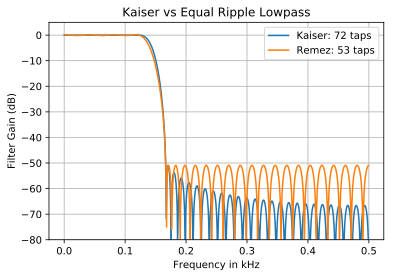

In [4]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

## A Highpass Design

In [5]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

Kaiser Win filter taps = 72.
Remez filter taps = 53.


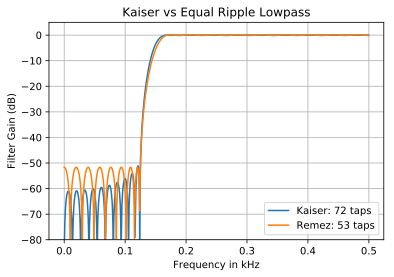

In [6]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

### Plot a Pole-Zero Map for the Equal-Ripple Design

(52, 0)

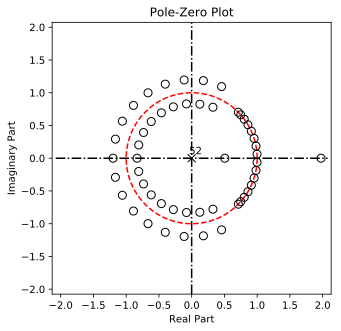

In [18]:
ss.zplane(b_r_hp,[1]) # the b and a coefficient arrays 

## A Bandpass Design

In [7]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

Kaiser Win filter taps = 142.
Remez filter taps = 101.


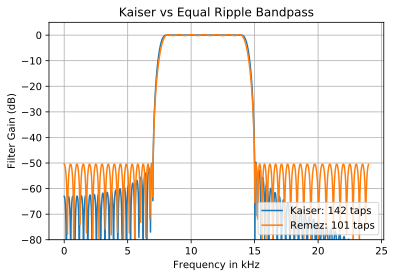

In [8]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

# Exporting Coefficients to Header Files
Once a filter design is complete it can be exported as a C header file using `FIR_header()` for floating-point design and `FIR_fix_header()` for 16-bit fixed-point designs.
## Float Header Export
```python
def FIR_header(fname_out,h):
    """
    Write FIR Filter Header Files 
    """
```
## 16 Bit Signed Integer Header Export
```python
def FIR_fix_header(fname_out,h):
    """
    Write FIR Fixed-Point Filter Header Files 
    """
```
These functions are available in `coeff2header.py`, which was imported as `c2h` above

### Write a Header File for the Bandpass Equal-Ripple

In [65]:
# Write a C header file
c2h.FIR_header('remez_8_14_bpf_f32.h',b_r_bp)

* The header file, `remez_8_14_bpf_f32.h` written above takes the form:

```c
//define a FIR coefficient Array

#include <stdint.h>

#ifndef M_FIR
#define M_FIR 101
#endif
/************************************************************************/
/*                         FIR Filter Coefficients                      */
float32_t h_FIR[M_FIR] = {-0.001475936747, 0.000735580994, 0.004771062558,
                           0.001254178712,-0.006176846780,-0.001755945520,
                           0.003667323660, 0.001589634576, 0.000242520766,
                           0.002386316353,-0.002699251419,-0.006927087152,
                           0.002072374590, 0.006247819434,-0.000017122009,
                           0.000544273776, 0.001224920394,-0.008238424843,
                          -0.005846603175, 0.009688130613, 0.007237935594,
                          -0.003554185785, 0.000423864572,-0.002894644665,
                          -0.013460012489, 0.002388684318, 0.019352295029,
                           0.002144732872,-0.009232278407, 0.000146728997,
                          -0.010111394762,-0.013491956909, 0.020872121644,
                           0.025104278030,-0.013643042233,-0.015018451283,
                          -0.000068299117,-0.019644863999, 0.000002861510,
                           0.052822261169, 0.015289946639,-0.049012297911,
                          -0.016642744836,-0.000164469072,-0.032121234463,
                           0.059953731027, 0.133383985599,-0.078819553619,
                          -0.239811117665, 0.036017541207, 0.285529343096,
                           0.036017541207,-0.239811117665,-0.078819553619,
                           0.133383985599, 0.059953731027,-0.032121234463,
                          -0.000164469072,-0.016642744836,-0.049012297911,
                           0.015289946639, 0.052822261169, 0.000002861510,
                          -0.019644863999,-0.000068299117,-0.015018451283,
                          -0.013643042233, 0.025104278030, 0.020872121644,
                          -0.013491956909,-0.010111394762, 0.000146728997,
                          -0.009232278407, 0.002144732872, 0.019352295029,
                           0.002388684318,-0.013460012489,-0.002894644665,
                           0.000423864572,-0.003554185785, 0.007237935594,
                           0.009688130613,-0.005846603175,-0.008238424843,
                           0.001224920394, 0.000544273776,-0.000017122009,
                           0.006247819434, 0.002072374590,-0.006927087152,
                          -0.002699251419, 0.002386316353, 0.000242520766,
                           0.001589634576, 0.003667323660,-0.001755945520,
                          -0.006176846780, 0.001254178712, 0.004771062558,
                           0.000735580994,-0.001475936747};
/************************************************************************/
```

* This file can be included in the main module of an ARM Cortex M4 micro controller using the [Cypress FM4](http://www.cypress.com/documentation/development-kitsboards/fm4-s6e2g-series-pioneer-kit-guide) $50 dev kit

In [9]:
f_AD,Mag_AD, Phase_AD = loadtxt('BPF_8_14_101tap_48k.csv',
                                delimiter=',',skiprows=6,unpack=True)

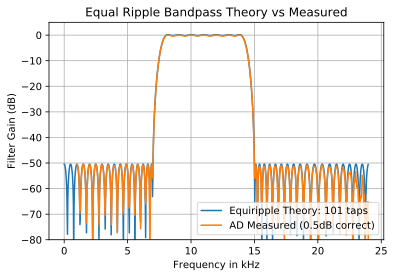

In [10]:
fir_d.freqz_resp_list([b_r_bp],[[1]],'dB',fs=48)
ylim([-80,5])
plot(f_AD/1e3,Mag_AD+.5)
title(r'Equal Ripple Bandpass Theory vs Measured')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Equiripple Theory: %d taps' % len(b_r_bp),
        r'AD Measured (0.5dB correct)'),loc='lower right',fontsize='medium')
grid();

# FIR Design Problem
Now its time to design and implement your own FIR filter using the filter design tools of `fir_design_helper.py`. The assignment here is to complete a design using a sampling rate of 48 kHz having an equiripple FIR lowpass lowpass response with 1dB cutoff frequency at 5 kHz, a passband ripple of 1dB, and stopband attenuation of 60 dB starting at 6.5 kHz. See Figure 9 for a graphical depiction of these amplitude response requirements.

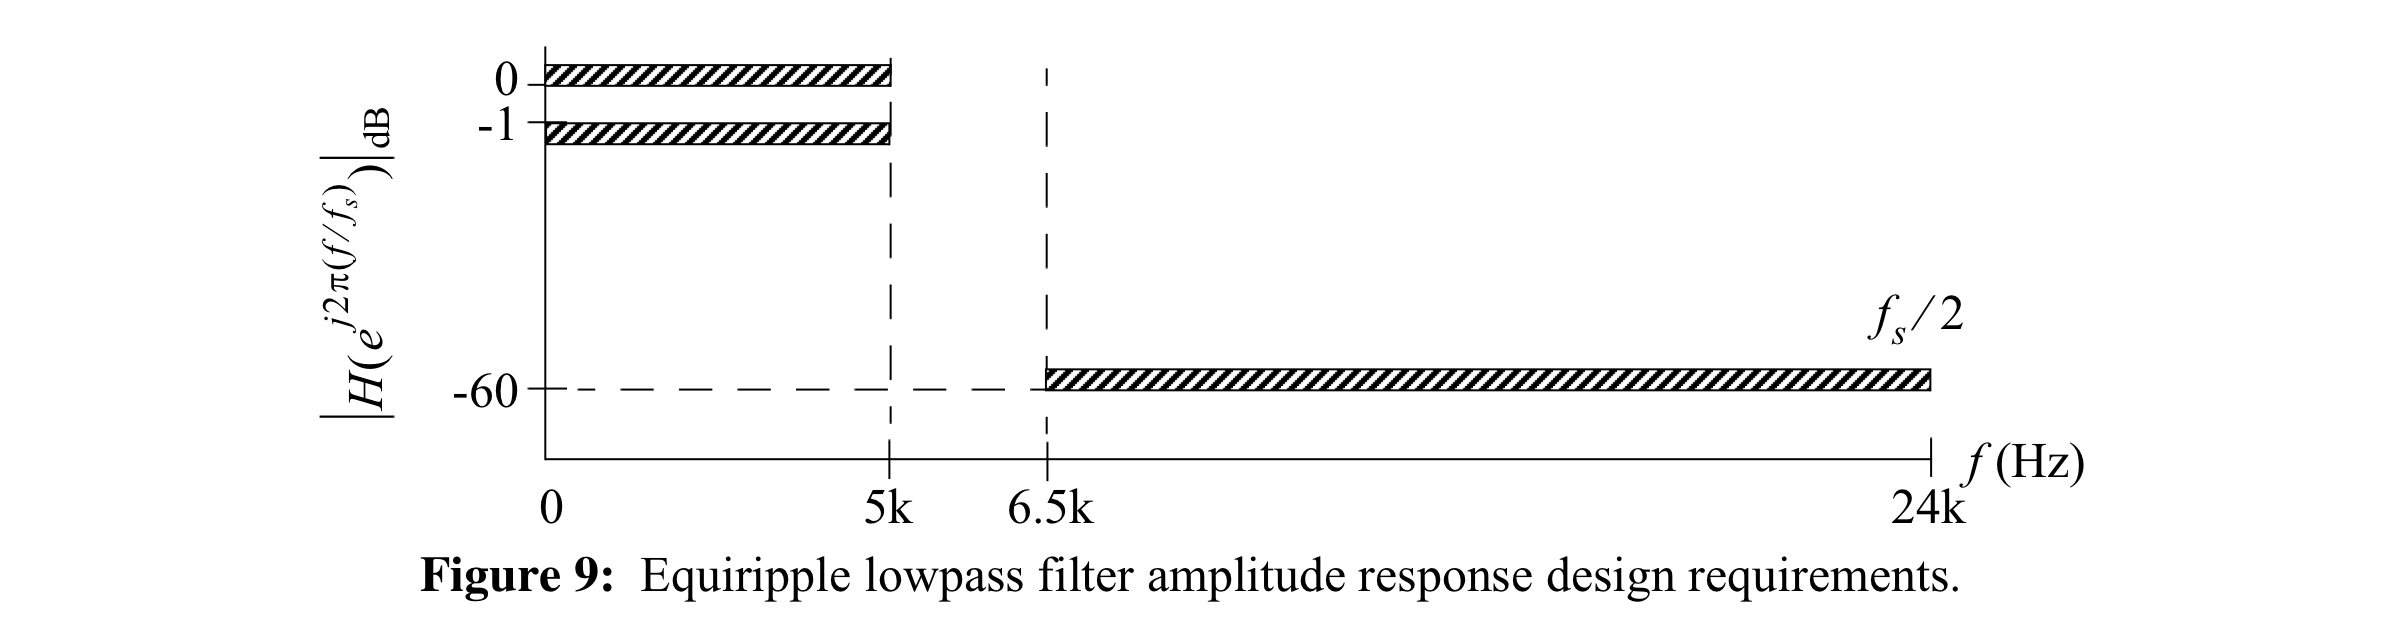

In [17]:
Image('images/FIR_LPF_Design.png',width='100%')

We can test this filter in Lab3 using PyAudio for real-time DSP.

In [ ]:
# Design the filter here


* Plot the magnitude response and phase response, and the pole-zero plot
* Using the `freqz_resp_list`
```Python
def freqz_resp_list(b,a=np.array([1]),mode = 'dB',fs=1.0,Npts = 1024,fsize=(6,4)):
"""
    A method for displaying a list filter frequency responses in magnitude,
    phase, and group delay. A plot is produced using matplotlib

    freqz_resp([b],[a],mode = 'dB',Npts = 1024,fsize=(6,4))

        b = ndarray of numerator coefficients
        a = ndarray of denominator coefficents
     mode = display mode: 'dB' magnitude, 'phase' in radians, or 
            'groupdelay_s' in samples and 'groupdelay_t' in sec, 
            all versus frequency in Hz
     Npts = number of points to plot; default is 1024
    fsize = figure size; defult is (6,4) inches
    """
```

In [ ]:
# fill in the plotting details
